# Mid Term Group Project

## Exploratory Data Analysis

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import gc
import seaborn as sns


%matplotlib inline

In [119]:
tr_identity = pd.read_csv('identity.csv')  #Reading Identity file
tr_transaction = pd.read_csv('transaction.csv') #Reading Transaction file

Checking sample data from identity and transaction table using head() command

In [120]:
tr_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [121]:
tr_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Checking shape of transaction and identity table

In [122]:
tr_identity.shape

(144233, 41)

In [123]:
tr_transaction.shape

(590540, 394)

The Identity data set has 41 columns and 144233 records

The transaction data set has 394 columns and 590540 records

In [124]:
# Merging the identity and transaction datasets using the column transaction ID

train_set = pd.merge(tr_transaction,tr_identity, on='TransactionID', how='left')

In [125]:
# checking the shape of the combined data set
train_set[train_set['isFraud']==0].shape

(569877, 434)

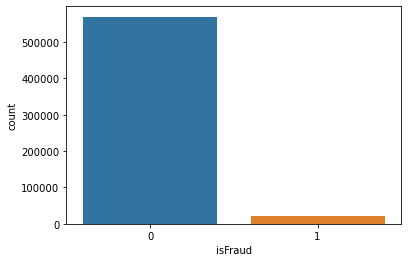

The % of good data is 96.50099908558268


In [126]:
sns.countplot(x='isFraud',data=train_set)
plt.show()
good_data = train_set[train_set['isFraud']==0].shape[0]/train_set.shape[0]*100
print(f'The % of good data is {good_data}')

In [127]:
train_set.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


- Description of all the columns of the combined data set

**Analysis on TransactionDT**

In [128]:
# Description of fraudulent transaction
train_set[train_set['isFraud']==1]['TransactionDT'].describe()

count    2.066300e+04
mean     7.690033e+06
std      4.416551e+06
min      8.976000e+04
25%      3.965858e+06
50%      7.575230e+06
75%      1.121743e+07
max      1.581088e+07
Name: TransactionDT, dtype: float64

In [129]:
# Description of non-fraudulent transaction
train_set[train_set['isFraud']==0]['TransactionDT'].describe()

count    5.698770e+05
mean     7.360791e+06
std      4.623930e+06
min      8.640000e+04
25%      3.010651e+06
50%      7.271678e+06
75%      1.125334e+07
max      1.581113e+07
Name: TransactionDT, dtype: float64

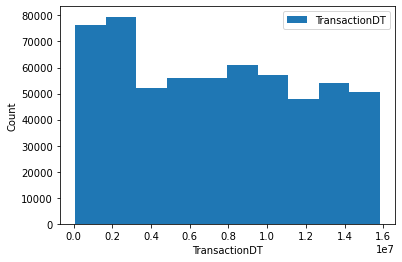

In [130]:
# Analysing the distribution of TransactionDT column values
train_set['TransactionDT'].hist(grid = False,legend= True,bins = 10)
plt.xlabel('TransactionDT')
plt.ylabel('Count')
plt.show()

**Analysis on TransactionAmt**

In [131]:
# Analysing the transaction Amt column for legit transaction data
legit_trx = tr_transaction.loc[tr_transaction['isFraud']==0]
legit_trx['TransactionAmt'].describe()

count    569877.000000
mean        134.511665
std         239.395078
min           0.251000
25%          43.970000
50%          68.500000
75%         120.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

In [132]:
# Analysing the transaction Amt column for fraud transaction data
fraud_trx = tr_transaction.loc[tr_transaction['isFraud']==1]
fraud_trx['TransactionAmt'].describe()

count    20663.000000
mean       149.244779
std        232.212163
min          0.292000
25%         35.044000
50%         75.000000
75%        161.000000
max       5191.000000
Name: TransactionAmt, dtype: float64

In [133]:
print('The Average Transaction Amount for legit transaction: ', legit_trx['TransactionAmt'].mean())

The Average Transaction Amount for legit transaction:  134.51166457896034


In [134]:
print('The Average Transaction Amount for fraudulent transaction: ', fraud_trx['TransactionAmt'].mean())

The Average Transaction Amount for fraudulent transaction:  149.2447785897534


In [24]:
#Since some values are high in the dataset lets create a new feature with the log of the data set

In [135]:
train_set['LogTransactionAmt'] = np.log(train_set['TransactionAmt'])

/Users/aravindakshanviswanathan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aravindakshanviswanathan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


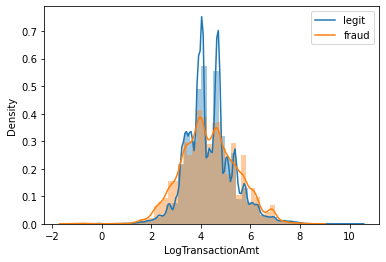

In [136]:
x = sns.distplot(train_set[train_set['isFraud']==0]['LogTransactionAmt'])
y = sns.distplot(train_set[train_set['isFraud']==1]['LogTransactionAmt'])
plt.legend(['legit','fraud'])

- From the figure we can infer that overlap values of fraud and legit is higher after 5 and before 3
- The logTransactionAmt from 3 to 5 have higher chance since it is legit transaction.

<AxesSubplot:xlabel='TransactionDT', ylabel='TransactionAmt'>

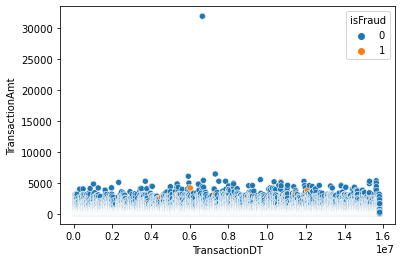

In [137]:
# check when the fraudulent transaction occured
sns.scatterplot(x="TransactionDT",y="TransactionAmt",hue="isFraud",data=train_set)

**Analysis on ProductCD column**

<AxesSubplot:xlabel='ProductCD', ylabel='percentage'>

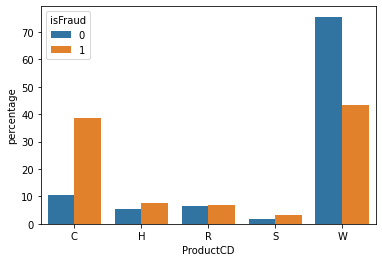

In [138]:
# Grouping the product CD and isFraud column to find the most fradulent transaction that had happened for a specific product

train_ProductCD = train_set.groupby(['isFraud'])['ProductCD'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('ProductCD')
sns.barplot(x="ProductCD", y="percentage", hue="isFraud", data=train_ProductCD)

- we can deduce that if the ProductCD is 'C' , there is 40% chance that it is a fraudulent transaction
- Likewise for ProductCDs 'H', 'R', 'S' rate of doing fraud is high

#Analyzing card1 column

In [139]:
#Finding statistics of card1 column
train_set['card1'].describe()

count    590540.000000
mean       9898.734658
std        4901.170153
min        1000.000000
25%        6019.000000
50%        9678.000000
75%       14184.000000
max       18396.000000
Name: card1, dtype: float64

/Users/aravindakshanviswanathan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aravindakshanviswanathan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


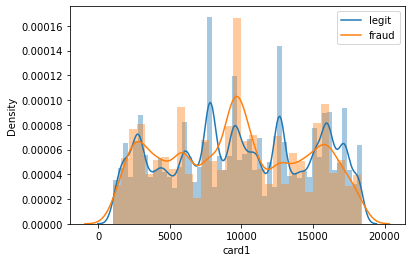

In [140]:
# Analyzing & plotting fraud transactions done on card1

x = sns.distplot(train_set[train_set['isFraud']==0]['card1'])
y = sns.distplot(train_set[train_set['isFraud']==1]['card1'])
plt.legend(['legit','fraud'])

- The density of fraudulant transactions on card1 is 0.00016 which seems reasonable

# Analysis on card 2 - card 5

In [141]:
train_set['card2'].describe()

count    581607.000000
mean        362.555488
std         157.793246
min         100.000000
25%         214.000000
50%         361.000000
75%         512.000000
max         600.000000
Name: card2, dtype: float64

/Users/aravindakshanviswanathan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aravindakshanviswanathan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


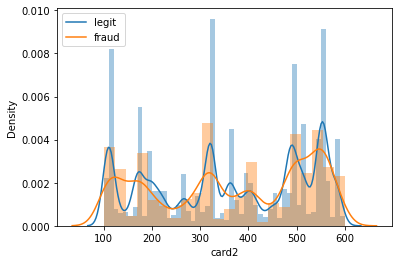

In [142]:
# Analyzing & plotting fraud transactions done on card2

x = sns.distplot(train_set[train_set['isFraud']==0]['card2'])
y = sns.distplot(train_set[train_set['isFraud']==1]['card2'])
plt.legend(['legit','fraud'])

In [143]:
train_set['card3'].describe()

count    588975.000000
mean        153.194925
std          11.336444
min         100.000000
25%         150.000000
50%         150.000000
75%         150.000000
max         231.000000
Name: card3, dtype: float64

/Users/aravindakshanviswanathan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aravindakshanviswanathan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


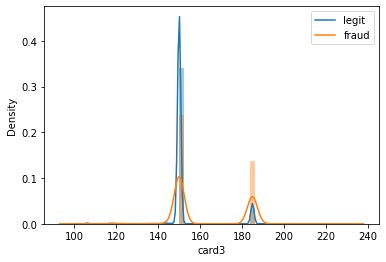

In [144]:
# Analyzing & plotting fraud transactions done on card3

x = sns.distplot(train_set[train_set['isFraud']==0]['card3'])
y = sns.distplot(train_set[train_set['isFraud']==1]['card3'])
plt.legend(['legit','fraud'])

- Majority of the fraudulant transactions are of 2 values only in card 3.


# Analysis on card 4

<AxesSubplot:xlabel='card4', ylabel='percentage'>

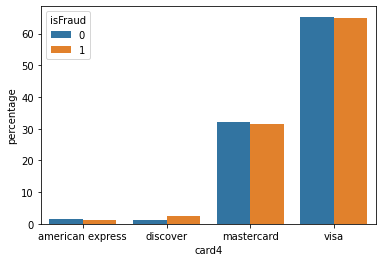

In [146]:
# Grouping the card4 and isFraud column to find the most fradulent transaction that had happened for a specific card company
train_card4 = (train_set[~train_set['card4'].isnull()].groupby(['isFraud'])['card4']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('card4'))
sns.barplot(x="card4", y="percentage", hue="isFraud", data=train_card4)

- The percentage of fraudulant transactions in visa and mastercard are 60% and 30%
- Though the percentage of fraud transaction in visa and mastercard may be high, discover has more fraudulant transactions compared to the legit transactions 



# Analysis on Card 5

In [36]:
train_set['card5'].describe()

count    586281.0
mean          NaN
std           0.0
min         100.0
25%         166.0
50%         226.0
75%         226.0
max         237.0
Name: card5, dtype: float64

/Users/aravindakshanviswanathan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aravindakshanviswanathan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


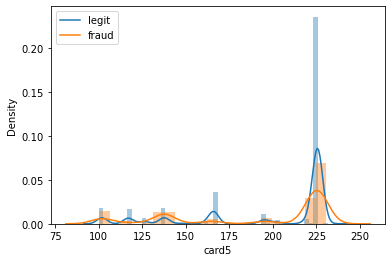

In [37]:
# Analyzing & plotting fraud transactions done on card3

x = sns.distplot(train_set[train_set['isFraud']==0]['card5'])
y = sns.distplot(train_set[train_set['isFraud']==1]['card5'])
plt.legend(['legit','fraud'])

- At some intervals there is high chance for fraud for example at 225. 
- Likewise, the legit transaction happen most at 160


# Analysis on card 6

<AxesSubplot:xlabel='card6', ylabel='percentage'>

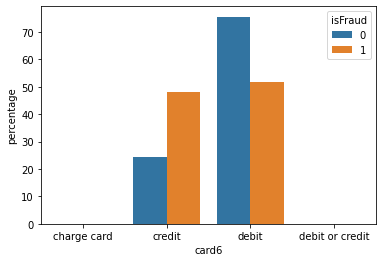

In [147]:
# Grouping the card6 and isFraud column to find the most fradulent transaction that had happened for a specific card type
train_card6 = (train_set[~train_set['card6'].isnull()].groupby(['isFraud'])['card6']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('card6'))
sns.barplot(x="card6", y="percentage", hue="isFraud", data=train_card6)

- credit card holders are prone to more fraudulent transactions than debit card holders
- charge card and debit or credit cards have no affect on the data set so lets replace them into one.

In [148]:
def replaceToStd(value):
    if value==np.nan:
        return value
    if value=='debit or credit' or value=='charge card':
        return 'debit'
    else:
        return value
train_set['card6'] = train_set['card6'].apply(replaceToStd)

# Analysis of address columns

- address 1 is the purchaser zip code
- address 2 is the billing country

In [149]:
train_set['addr1'].describe()

count    524834.000000
mean        290.733794
std         101.741072
min         100.000000
25%         204.000000
50%         299.000000
75%         330.000000
max         540.000000
Name: addr1, dtype: float64

/Users/aravindakshanviswanathan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aravindakshanviswanathan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


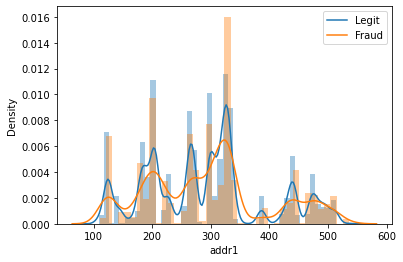

In [150]:
# Analyzing & plotting fraudulant transactions based on address column in the data set
x = sns.distplot(train_set[(train_set['isFraud']==0) & (~train_set['addr1'].isnull())]['addr1'])
y = sns.distplot(train_set[(train_set['isFraud']==1) & (~train_set['addr1'].isnull())]['addr1'])
plt.legend(['Legit','Fraud'])

In [151]:
# Similarily for address 2 
train_set['addr2'].describe()

count    524834.000000
mean         86.800630
std           2.690623
min          10.000000
25%          87.000000
50%          87.000000
75%          87.000000
max         102.000000
Name: addr2, dtype: float64

/Users/aravindakshanviswanathan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aravindakshanviswanathan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


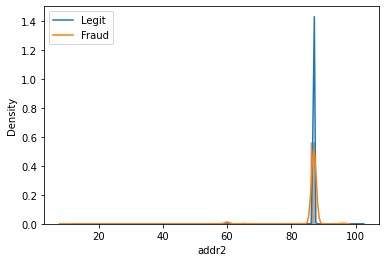

In [152]:
# plotting fraudulant transactions based on address column in data set
x = sns.distplot(train_set[(train_set['isFraud']==0) & (~train_set['addr2'].isnull())]['addr2'])
y = sns.distplot(train_set[(train_set['isFraud']==1) & (~train_set['addr2'].isnull())]['addr2'])
plt.legend(['Legit','Fraud'])

- Most of the data is from 80-100 which means that most of the data is from a particular country. 
- Now lets check whether this is true or not

In [153]:
train_set['addr2'].value_counts()

87.0    520481
60.0      3084
96.0       638
32.0        91
65.0        82
         ...  
49.0         1
14.0         1
25.0         1
22.0         1
93.0         1
Name: addr2, Length: 74, dtype: int64

In [154]:
# Country with code 87 has majority of the data
print('Country with code 87 has ',round(520481/train_set.shape[0]*100,2), '% of total data')

Country with code 87 has  88.14 % of total data


- As you can see more than half a million values are from a country with code 87, which seems interesting.

# Analysis for P_emaildomain and R_emaildomain

In [155]:
# Calculating the count of each domain in the data sets
train_set['P_emaildomain'].value_counts()

gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
hotmail.es             305
roadrunner.com         305
windstream.net         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
netzero.com            230
t

- From the results, we can see that the emails have been received from different domains, so lets find out which domain has suffered from most fraudulant transactions
- Also the Gmail , Yahoo and Hotmail are the mostly used emails in the dataset


In [156]:
# Here we are splitting the domain name from the (.) and taking the name out

def returndomainname(email):
    return email.split(".")[0]
train_set['domain_name'] = train_set[~train_set['P_emaildomain'].isnull()]['P_emaildomain'].apply(returndomainname)

In [157]:
#checking the different set of domains in the dataset
train_set['domain_name'].unique()

array([nan, 'gmail', 'outlook', 'yahoo', 'mail', 'anonymous', 'hotmail',
       'verizon', 'aol', 'me', 'comcast', 'optonline', 'cox', 'charter',
       'rocketmail', 'prodigy', 'embarqmail', 'icloud', 'live', 'att',
       'juno', 'ymail', 'sbcglobal', 'bellsouth', 'msn', 'q',
       'centurylink', 'servicios-ta', 'earthlink', 'cfl', 'roadrunner',
       'netzero', 'gmx', 'suddenlink', 'frontiernet', 'windstream',
       'frontier', 'mac', 'aim', 'web', 'twc', 'cableone', 'sc', 'ptd',
       'protonmail'], dtype=object)

In [158]:
# Grouping domain_name and isFraud to check if the transaction is fraudulent data or not
train_email = (train_set.groupby(['isFraud'])['domain_name']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('domain_name'))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'aim'),
  Text(1, 0, 'anonymous'),
  Text(2, 0, 'aol'),
  Text(3, 0, 'att'),
  Text(4, 0, 'bellsouth'),
  Text(5, 0, 'cableone'),
  Text(6, 0, 'centurylink'),
  Text(7, 0, 'cfl'),
  Text(8, 0, 'charter'),
  Text(9, 0, 'comcast'),
  Text(10, 0, 'cox'),
  Text(11, 0, 'earthlink'),
  Text(12, 0, 'embarqmail'),
  Text(13, 0, 'frontier'),
  Text(14, 0, 'frontiernet'),
  Text(15, 0, 'gmail'),
  Text(16, 0, 'gmx'),
  Text(17, 0, 'hotmail'),
  Text(18, 0, 'icloud'),
  Text(19, 0, 'juno'),
  Text(20, 0, 'live'),
  Text(21, 0, 'mac'),
  Text(22, 0, 'mail'),
  Text(23, 0, 'me'),
  Text(24, 0, 'msn'),
  Text(25, 0, 'netzero'),
  Text(26, 0, 'optonline'),
  Text(27, 0, 'outlook'),
  Text(28, 0, 'prodigy'),
  Text(29, 0, 'protonmail'),
  Text(30, 0, 'ptd'),
  Text(31, 0, 'q'),
  Text(32, 

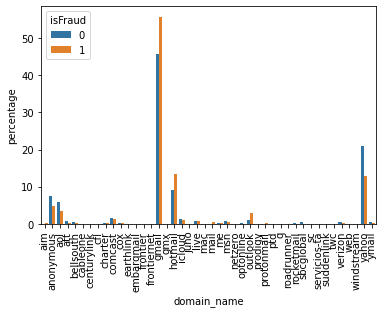

In [159]:
# xticks function : Get or set the current tick locations and labels of the x-axis
sns.barplot(x="domain_name", y="percentage", hue="isFraud", data=train_email)
plt.xticks(rotation = 90)

- Based on the above graph, we can say that most of the data has email from gmail domain which is fair to say also has more fraud transactions. 
- Also, Hotmail is the only domain which has more fraud transactions than legit transactions. 

**Analysis for C1 - C14 columns**

Instead of utilizing the same describe function for all the C features, we are using the correlation matrix to find the relationship between them.

In [160]:
corr_c = train_set[['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','isFraud']]

In [161]:
# Finding the correlation between columns using the corr() function

cr = corr_c.corr()

/var/folders/62/58h24g5d0qq8lz19bvl398mm0000gn/T/ipykernel_12741/1749009934.py:4: UserWarning: Only one segment is calculated since parameter NFFT (=149) >= signal length (=15).
  plt.specgram(cr,NFFT = 149)


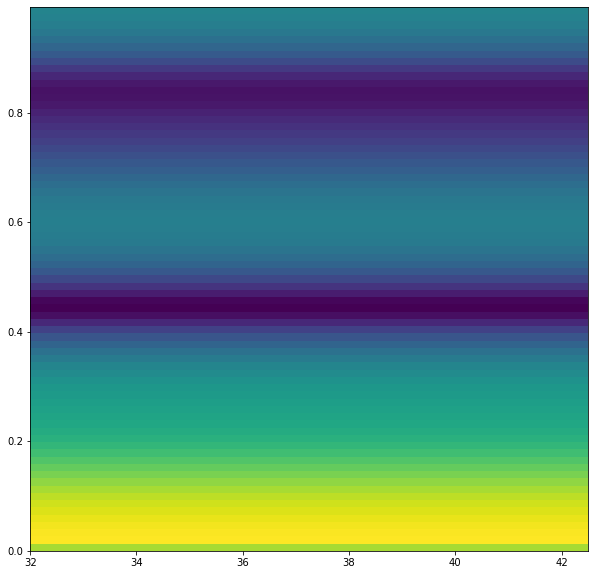

In [162]:
# Analyzing & Plotting the correlation between the C1 column series and the isFraud column

plt.figure(1,figsize=(10,10))
plt.specgram(cr,NFFT = 149)
plt.show()

- We have used specgram to visualize the features of various C columns

**Analysis for D features i.e., D1 to D15**

- Likewise for C features we will be using correlation matrix for D features

In [163]:
#finding the corelation between these D with 'isFraud' column
corr_d = train_set[['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15','isFraud']]

In [164]:
cr1 = corr_d.corr()

<AxesSubplot:>

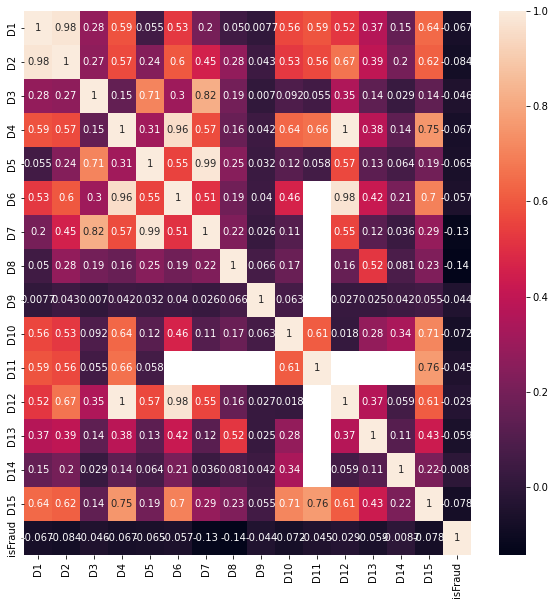

In [165]:
plt.figure(1,figsize=(10,10))
sns.heatmap(cr1,annot=True)

- Highly correlated features are  'D4 and D12' and 'D6 and D12' and 'D5 and D7'

**Data Analysis for M features**

In [166]:
# Finding out the unique values in each of the 'M' series of columns
for i in ['M1','M2','M3','M4','M5','M6','M7','M8','M9']:
    print(train_set[(~train_set[i].isnull())&(train_set['isFraud']==0)][i].value_counts())
    print(train_set[(~train_set[i].isnull())&(train_set['isFraud']==1)][i].value_counts())
    print('\n\n')

T    313073
F        25
Name: M1, dtype: int64
T    6342
Name: M1, dtype: int64



T    280310
F     32788
Name: M2, dtype: int64
T    5158
F    1184
Name: M2, dtype: int64



T    247438
F     65660
Name: M3, dtype: int64
T    4293
F    2049
Name: M3, dtype: int64



M0    189207
M2     53056
M1     51397
Name: M4, dtype: int64
M0    7198
M2    6809
M1    1429
Name: M4, dtype: int64



F    128977
T    103512
Name: M5, dtype: int64
T    4055
F    3514
Name: M5, dtype: int64



F    222459
T    190029
Name: M6, dtype: int64
F    5397
T    3295
Name: M6, dtype: int64



F    207285
T     32173
Name: M7, dtype: int64
F    4089
T     728
Name: M7, dtype: int64



F    151878
T     87593
Name: M8, dtype: int64
F    3373
T    1444
Name: M8, dtype: int64



T    201998
F     37473
Name: M9, dtype: int64
T    3658
F    1159
Name: M9, dtype: int64






- Most of the M features are binary distributed i.e., 0 and 1 
- Except M4 feature which has 3 unique values, M0, M1, M2

**Data Analysis on V features**

- In the transaction data set we have 339 V features. We cannot visualize them one by one.
- First we'll seperate V features and then see what can we find out.

In [168]:
# seperating vfeatures from rest of the features. 
v_features = []
for i in train_set.columns:
    if 'V' in i:
        v_features.append(i)

In [169]:
# creating a data frame of v features.
v_features_df = tr_transaction[v_features]

In [170]:
v_features_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
# Finiding no of NaN values in each V columns.
v_features_df.isna().sum()

V1      279287
V2      279287
V3      279287
V4      279287
V5      279287
         ...  
V335    508189
V336    508189
V337    508189
V338    508189
V339    508189
Length: 339, dtype: int64

In [172]:
# Checking the description of each of the V series columns

v_features_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,0.999945,1.045204,1.078075,0.846456,0.876991,1.045686,1.072870,1.027704,1.041529,0.463915,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,0.007390,0.240133,0.320890,0.440053,0.475902,0.239385,0.304779,0.186069,0.226339,0.521522,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,8.000000,9.000000,6.000000,6.000000,9.000000,9.000000,8.000000,8.000000,4.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


**Data Analysis on DeviceInfo and DeviceType**

In [173]:
# Finding the number of unique values present in Device Info column
train_set['DeviceInfo'].value_counts()

Windows        47722
iOS Device     19782
MacOS          12573
Trident/7.0     7440
rv:11.0         1901
               ...  
LGMS345            1
verykool           1
XT1072             1
LG-H931            1
0PJA2              1
Name: DeviceInfo, Length: 1786, dtype: int64

- There are 1786 devices used in the transaction which is a lot. 

<AxesSubplot:xlabel='DeviceType', ylabel='percentage'>

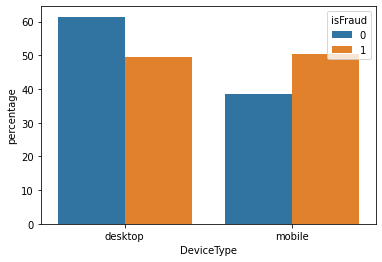

In [174]:
# Grouping by Device type and isFraud to compare both using barplot

DeviceType = (train_set.groupby(['isFraud'])['DeviceType']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('DeviceType'))
sns.barplot(x="DeviceType", y="percentage", hue="isFraud", data=DeviceType)

- Mostly mobile transactions are fraudulant.
- Both desktop and mobile have same percentage of fraudulant transactions. 


- EDA on id features is being done in next section aside from that we did EDA on every other feature in the data set.

# Feature Engineering and Selection

- In this part, we'll decide which features should we use and what other transformations or functions should we use so as to make our data set ready to use on ML model

In [175]:
# Finding out the data sets which has a data type object

categorical_col = [feature for feature in tr_identity.columns if tr_identity[feature].dtype=='O']
categorical_col

['id_12',
 'id_15',
 'id_16',
 'id_23',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo']

In [176]:
# Calculating the percentage of NaN values in each of the categorical columns

for feature in categorical_col:
    print("{}: {}% of values are missing".format(feature,np.round(tr_identity[feature].isnull().mul(100).mean(),4)))

id_12: 0.0% of values are missing
id_15: 2.2519% of values are missing
id_16: 10.3257% of values are missing
id_23: 96.4162% of values are missing
id_27: 96.4162% of values are missing
id_28: 2.2568% of values are missing
id_29: 2.2568% of values are missing
id_30: 46.2224% of values are missing
id_31: 2.7393% of values are missing
id_33: 49.1871% of values are missing
id_34: 46.056% of values are missing
id_35: 2.2519% of values are missing
id_36: 2.2519% of values are missing
id_37: 2.2519% of values are missing
id_38: 2.2519% of values are missing
DeviceType: 2.3732% of values are missing
DeviceInfo: 17.7262% of values are missing


- Since categorical values are important in ML model, we'll remove those features whose %NaN values are high.
- In this case id_23 and id_27 which have 96% of NaN values in them.

In [177]:
# Dropping the columns 'id_23' and 'id_27' since it has 96% of NaN values
tr_identity.drop(['id_23', 'id_27'], axis=1)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


- We deal with NaN values in general based on the dtype. If dtype is object, we use the data mode to impute NaN values. If dtype is numerical, we impute NaN values using the data's mean or Replace them with specified values or remove them entirely, however this is inefficient with model. We're dealing with NaN numbers at this point by replacing them with '-999'. If roc auc score uses this less, we'll attempt a different way for dealing with NaNs.

In [178]:
# replace NaN values
tr_identity=tr_identity.fillna(value=-999)

In [179]:
# Replace with numerical values
# Manually replaced all the categorical values with numerical values because the model does not understand the categorical values.
tr_identity = tr_identity.replace("Found", 1)
tr_identity = tr_identity.replace("NotFound", 2)
tr_identity = tr_identity.replace("New", 3)
tr_identity = tr_identity.replace("mobile", 4)
tr_identity = tr_identity.replace("desktop", 5)
tr_identity = tr_identity.replace("T", 6)
tr_identity = tr_identity.replace("F", 7)

In [180]:
tr_identity.select_dtypes("object")

,id_15,id_23,id_30,id_31,id_33,id_34,DeviceInfo
0,3,-999,Android 7.0,samsung browser 6.2,2220x1080,match_status:2,SAMSUNG SM-G892A Build/NRD90M
1,3,-999,iOS 11.1.2,mobile safari 11.0,1334x750,match_status:1,iOS Device
2,1,-999,-999,chrome 62.0,-999,-999,Windows
3,3,-999,-999,chrome 62.0,-999,-999,-999
4,1,-999,Mac OS X 10_11_6,chrome 62.0,1280x800,match_status:2,MacOS
...,...,...,...,...,...,...,...
144228,1,-999,-999,chrome 66.0 for android,-999,-999,F3111 Build/33.3.A.1.97
144229,3,-999,Android 7.1.1,chrome 55.0 for android,855x480,match_status:2,A574BL Build/NMF26F
144230,3,-999,-999,chrome 65.0 for android,-999,-999,Moto E (4) Plus Build/NMA26.42-152
144231,1,-999,Mac OS X 10_9_5,chrome 66.0,2560x1600,match_status:2,MacOS


In [181]:
# Typecasting - To convert into string values, as label encoder uses string format
# Function provides the capability to convert any suitable existing column to categorical type. 
tr_identity["id_15"]=tr_identity["id_15"].astype(str)
tr_identity["id_23"]=tr_identity["id_23"].astype(str)
tr_identity["id_30"]=tr_identity["id_30"].astype(str)
tr_identity["id_31"]=tr_identity["id_31"].astype(str)
tr_identity["id_33"]=tr_identity["id_33"].astype(str)
tr_identity["id_34"]=tr_identity["id_34"].astype(str)
tr_identity["DeviceInfo"]=tr_identity["DeviceInfo"].astype(str)

In [182]:
tr_identity.select_dtypes("object")

,id_15,id_23,id_30,id_31,id_33,id_34,DeviceInfo
0,3,-999,Android 7.0,samsung browser 6.2,2220x1080,match_status:2,SAMSUNG SM-G892A Build/NRD90M
1,3,-999,iOS 11.1.2,mobile safari 11.0,1334x750,match_status:1,iOS Device
2,1,-999,-999,chrome 62.0,-999,-999,Windows
3,3,-999,-999,chrome 62.0,-999,-999,-999
4,1,-999,Mac OS X 10_11_6,chrome 62.0,1280x800,match_status:2,MacOS
...,...,...,...,...,...,...,...
144228,1,-999,-999,chrome 66.0 for android,-999,-999,F3111 Build/33.3.A.1.97
144229,3,-999,Android 7.1.1,chrome 55.0 for android,855x480,match_status:2,A574BL Build/NMF26F
144230,3,-999,-999,chrome 65.0 for android,-999,-999,Moto E (4) Plus Build/NMA26.42-152
144231,1,-999,Mac OS X 10_9_5,chrome 66.0,2560x1600,match_status:2,MacOS


In [183]:
#Label Encoder is being used to convert categorical values to unique numerical values
# We are converting the categorical data to numerical values so that the data is machine readable
tr_identity["DeviceInfo"] = LabelEncoder().fit_transform(tr_identity["DeviceInfo"])
tr_identity["id_30"] = LabelEncoder().fit_transform(tr_identity["id_30"])
tr_identity["id_31"] = LabelEncoder().fit_transform(tr_identity["id_31"])
tr_identity["id_33"] = LabelEncoder().fit_transform(tr_identity["id_33"])
tr_identity["id_34"] = LabelEncoder().fit_transform(tr_identity["id_34"])
tr_identity["id_15"] = LabelEncoder().fit_transform(tr_identity["id_15"])
tr_identity["id_23"] = LabelEncoder().fit_transform(tr_identity["id_23"])

In [184]:
tr_transaction = tr_transaction.fillna(value=-999)

In [185]:
# Find categorical features
categorical_col = [feature for feature in tr_transaction.columns if tr_transaction[feature].dtype=='O']
categorical_col

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [186]:
# Function provides the capability to convert any suitable existing column to categorical type. 

for feature in categorical_col:
    tr_transaction[feature]=tr_transaction[feature].astype(str)

In [187]:

for feature in categorical_col:
    tr_transaction[feature]=LabelEncoder().fit_transform(tr_transaction[feature])

In [ ]:
# Merge both dataframes
df_combined = pd.merge(tr_identity, tr_transaction, on = "TransactionID", how = "outer")
df_combined.head()

In [80]:
df_combined.isna().sum()

TransactionID         0
id_01            446307
id_02            446307
id_03            446307
id_04            446307
                  ...  
V335                  0
V336                  0
V337                  0
V338                  0
V339                  0
Length: 434, dtype: int64

In [81]:
df_combined=df_combined.dropna()

In [82]:
df_combined.isna().sum()

TransactionID    0
id_01            0
id_02            0
id_03            0
id_04            0
                ..
V335             0
V336             0
V337             0
V338             0
V339             0
Length: 434, dtype: int64

In [83]:
# Checking the shape of the new combined data frame
df_combined.shape

(144233, 434)

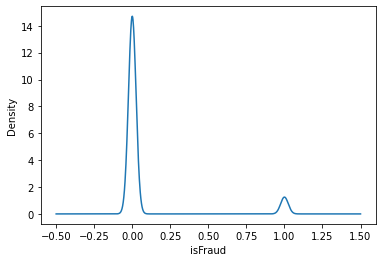

In [84]:
df_combined['isFraud'].plot.density()
plt.xlabel('isFraud')
plt.show()

In [85]:
df_combined['isFraud'].value_counts()

0    132915
1     11318
Name: isFraud, dtype: int64

# Model 1 - Decision Tree Classifier

In [1]:
# Importing train test split to create validation set
from sklearn.model_selection import train_test_split

In [87]:
y = df_combined['isFraud']
X = df_combined.drop(['isFraud'],axis = 1)

In [88]:
# Creating the training and test set
# We are splitting the datasets into 80% training set and 20% test set
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0,stratify = y,test_size=0.2)

In [89]:
# Distribution in training set
y_train.value_counts(normalize=True)

0    0.921533
1    0.078467
Name: isFraud, dtype: float64

In [90]:
# Distribution in test set
y_test.value_counts(normalize=True)

0    0.921517
1    0.078483
Name: isFraud, dtype: float64

In [91]:
# Shape of training set
X_train.shape,y_train.shape

((115386, 433), (115386,))

In [92]:
# Shape of test set
X_test.shape,y_valid.shape

((28847, 433), (28847,))

In [93]:
#importing DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [94]:
# importing DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [95]:
# creating the decision tree function
dt_model = DecisionTreeClassifier(random_state = 0)

In [96]:
# Fitting the model
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [97]:
# checking the training score
dt_model.score(X_train,y_train)

1.0

In [98]:
#checking the test score
dt_model.score(X_valid,y_test)

0.9528547162616563

In [99]:
# prediction on test set
dt_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [100]:
dt_model.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [101]:
y_pred = dt_model.predict_proba(X_test)[:,1]

In [102]:
new_y = []
for i in range(len(y_pred)):
    if y_pred[i]<0.8:
        new_y.append(0)
    else:
        new_y.append(1)

In [103]:
from sklearn.metrics import accuracy_score

In [114]:
print(f'The Accuracy of this model is :{accuracy_score(y_test,new_y)}')

The Accuracy of this model is :0.9528547162616563


# Model 2 - Random Forest

In [105]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [106]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(115386, 433) (115386,) (28847, 433) (28847,)


In [107]:
clf = DecisionTreeClassifier(max_depth=7,class_weight='balanced')
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7)

In [108]:
y_pred_dt = clf.predict(X_test)

In [109]:
print('AUC score: ',roc_auc_score(y_test,y_pred_dt))

AUC score:  0.8524112601974988


- this means that model is predicting fraudulant transactions correctly almost 95.2% of the time 


- Decision Tree Model is our **FINAL MODEL** for project submission.